In [ ]:
# metrics are as follows:

# Genre - the genre of the track
# Year - the release year of the recording. Note that due to vagaries of releases, re-releases, re-issues and general madness, sometimes the release years are not what you'd expect.
# Added - the earliest date you added the track to your collection.
# Beats Per Minute (BPM) - The tempo of the song.
# Energy - The energy of a song - the higher the value, the more energtic. song
# Danceability - The higher the value, the easier it is to dance to this song.
# Loudness (dB) - The higher the value, the louder the song.
# Liveness - The higher the value, the more likely the song is a live recording.
# Valence - The higher the value, the more positive mood for the song.
# Length - The duration of the song.
# Acousticness - The higher the value the more acoustic the song is.
# Speechiness - The higher the value the more spoken word the song contains.
# Popularity - The higher the value the more popular the song is.
# Duration - The length of the song.

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")
import sys
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression, Ridge, Lasso
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.neighbors import KNeighborsRegressor

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
data = pd.read_csv("/content/drive/MyDrive/naya_shaker/songs/SpotifyFeatures.csv")
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,228159.000000,228159.000000,228159.000000,2.281590e+05,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000
mean,44.209130,0.351200,0.554198,2.366092e+05,0.580967,0.137310,0.214638,-9.354658,0.122442,117.423062,0.444795
std,17.276599,0.351385,0.183949,1.166787e+05,0.260577,0.292447,0.196977,5.940994,0.186264,30.712458,0.255397
min,0.000000,0.000001,0.056900,1.550900e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,33.000000,0.030900,0.437000,1.862530e+05,0.405000,0.000000,0.097700,-11.287000,0.036800,92.734000,0.232000
50%,47.000000,0.205000,0.570000,2.211730e+05,0.618000,0.000037,0.128000,-7.515000,0.050600,115.347000,0.430000
75%,57.000000,0.689000,0.690000,2.648400e+05,0.793000,0.023400,0.263000,-5.415000,0.109000,138.887000,0.643000
max,100.000000,0.996000,0.987000,5.552917e+06,0.999000,0.999000,1.000000,1.585000,0.967000,239.848000,1.000000


In [12]:
df=data.copy()
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


#check for null values or duplicates

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228159 entries, 0 to 228158
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             228159 non-null  object 
 1   artist_name       228159 non-null  object 
 2   track_name        228159 non-null  object 
 3   track_id          228159 non-null  object 
 4   popularity        228159 non-null  int64  
 5   acousticness      228159 non-null  float64
 6   danceability      228159 non-null  float64
 7   duration_ms       228159 non-null  int64  
 8   energy            228159 non-null  float64
 9   instrumentalness  228159 non-null  float64
 10  key               228159 non-null  object 
 11  liveness          228159 non-null  float64
 12  loudness          228159 non-null  float64
 13  mode              228159 non-null  object 
 14  speechiness       228159 non-null  float64
 15  tempo             228159 non-null  float64
 16  time_signature    22

In [14]:
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [15]:
#Check for Duplicates
rs,cs = df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates



# Looking over distribution of vslues and look for extreme values

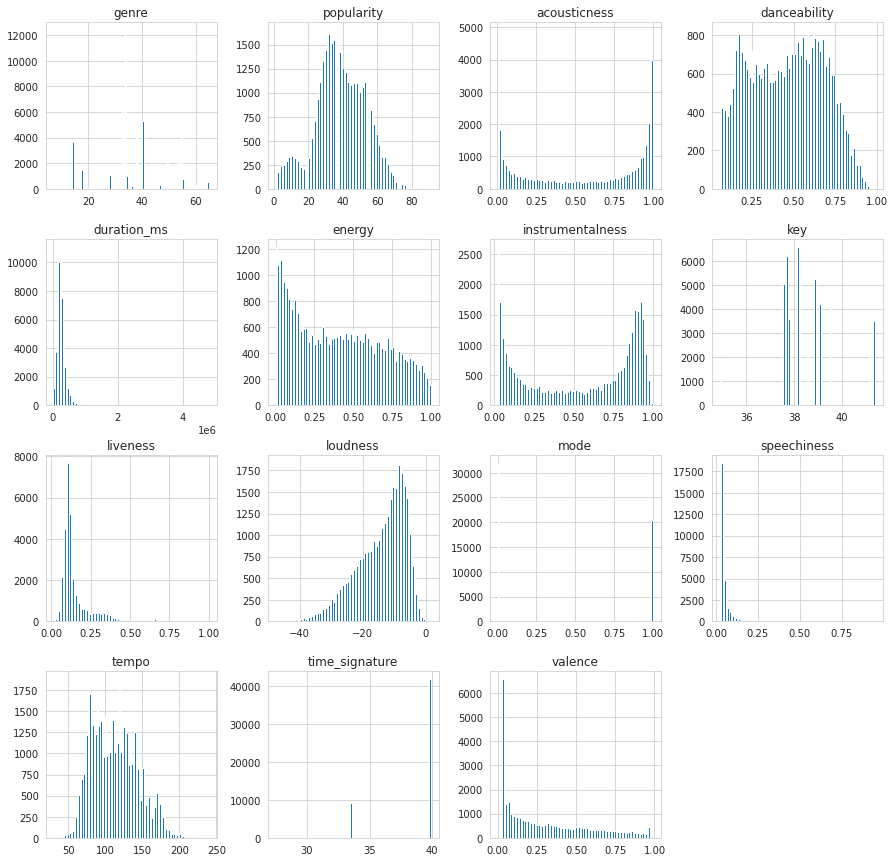

In [42]:
df.hist(figsize =[15, 15],bins=100 );

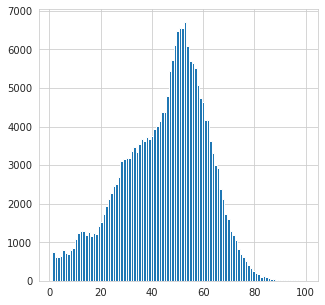

In [17]:
# cheking the distribution of parameters 
df['popularity'][df['popularity']>0.0000].hist(figsize =[5, 5],bins=100 )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


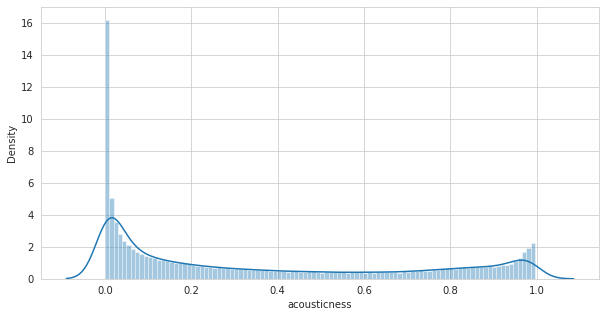

In [18]:
plt.figure(figsize=(10, 5))
sns.distplot(df.acousticness, bins=100)

take out poularity==0 as outlier
'instrumentalness']>0.05

#cleaning the data from outliers
1. ['instrumentalness']>0.02
2. ['acousticness']>0.001]

In [19]:
df=df[df['instrumentalness']>0.02]
df=df[df['acousticness']>0.001]
df=df[df['popularity']>0]

#Checking for correlations

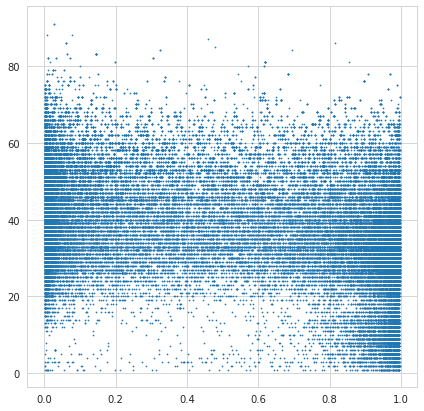

In [20]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
lines=ax.scatter(df['acousticness'],df['popularity'] , s= 0.5 )

## Inspecting the correlation matrix to look for fitures for linear regresion
We choose significant numeric variables to be with R>0.1 :
acousticness , danceability , energy , instrumentalness ,loudness ,tempo , valence


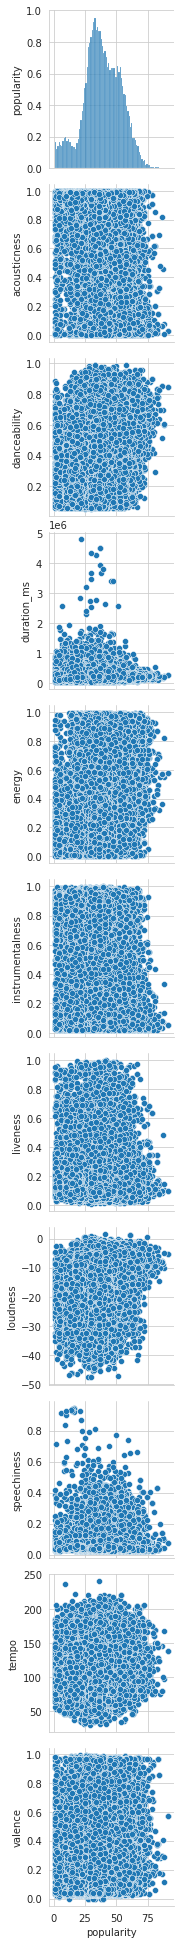

In [21]:
sns.pairplot(df, x_vars='popularity')#, palette=None, vars=None, x_vars=None)

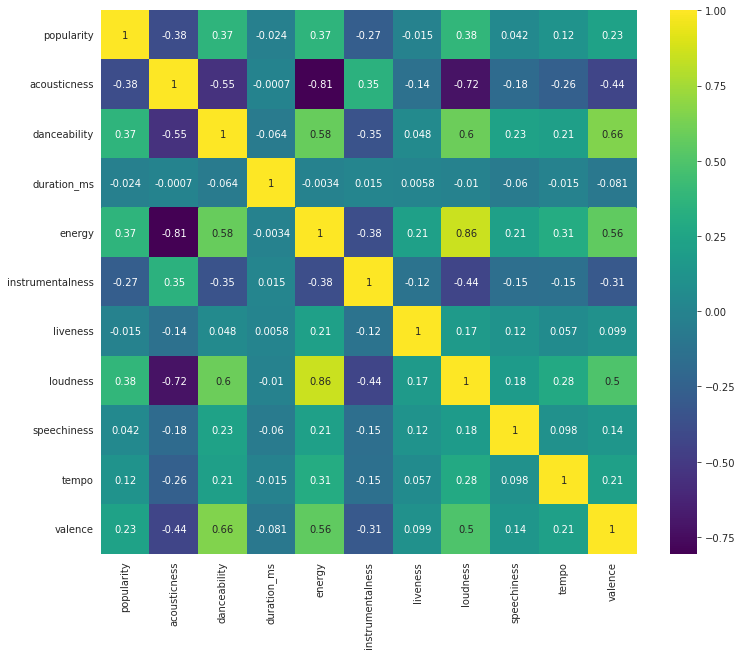

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

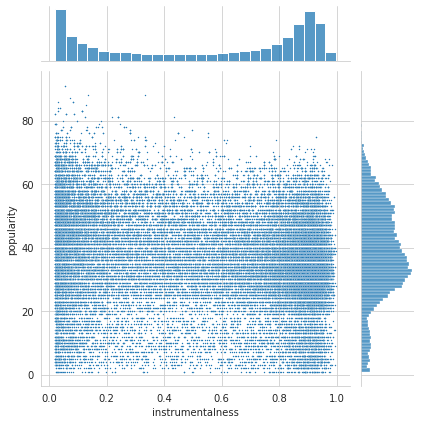

In [23]:
sns.jointplot(x = 'instrumentalness', y = 'popularity', data =df, s= 2)

# inspecting categorical variables 
1. 'Key' variable has no effect on 'popularity'
2. 'Mode' variable have a minor effect
3. 'Genre' seems to be the most significant
4. 'artist_name' have to many values and cannot be manipulated to numeric.
5. 'track_name' and 'track_ID' are not relevant for calculation

In [24]:
df.nunique().sort_values(axis=0)

mode                    2
time_signature          5
key                    12
genre                  26
popularity             89
speechiness          1201
danceability         1273
liveness             1554
valence              1680
instrumentalness     1697
energy               2460
acousticness         2618
artist_name          5861
loudness            21838
duration_ms         29061
tempo               31505
track_name          39215
track_id            41606
dtype: int64

Text(0.5, 1.0, 'popularity Based on time_signature')

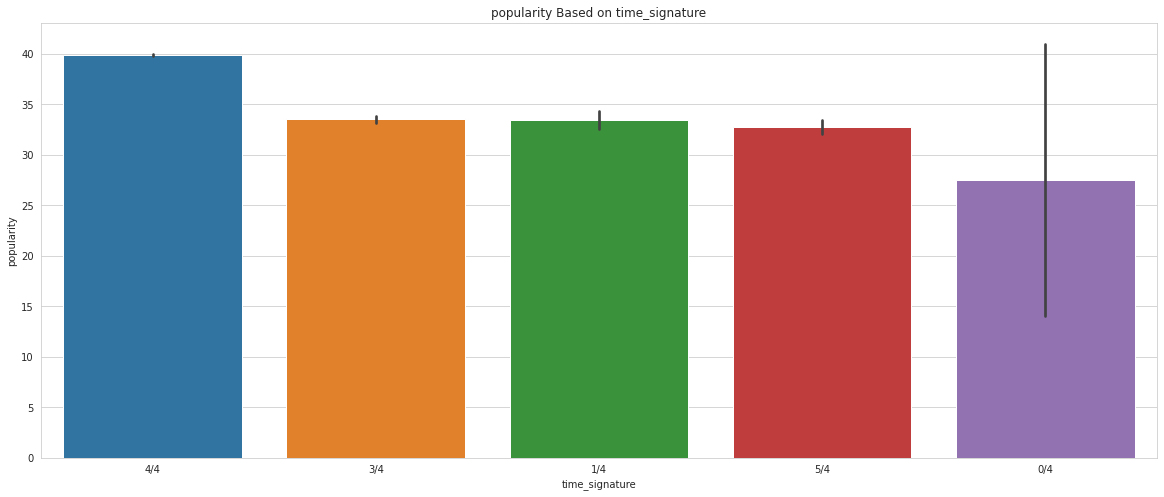

In [25]:
x = 'time_signature'
y = 'popularity'
plt.figure(figsize = (20, 8))
sns.barplot(x = x, y = y, data = df)
plt.title(y + ' Based on ' + x)

# Data Preprocessing

#cleaning the data from outliers
1. ['instrumentalness']>0.02
2. ['acousticness']>0.001]

In [26]:
df=data.copy()

In [27]:
df=df[df['instrumentalness']>0.02]
df=df[df['acousticness']>0.001]
df=df[df['popularity']>0]

# Feature Engineering
There are 3 categorical variables (key, mode, and time signature) 

## Creating a rank of Keys, Generes based on popularity 
transforming the categorical variables to numric values- based on popularity rank

In [28]:
def rank_var(df, var, rank_var):
    '''
    Function that creates an index of the categorical var column, based on the mean value calculated for the rank var
    df= the data frame
    var= str, column name of the categorical variable
    rank_var= str, the column name of the numrical variable to be ranked
    '''
    df_var=df.groupby(var).mean()
    var_index=df_var[rank_var].sort_values()
    print(var_index)
    df[var]=df[var].map(var_index.to_dict())

In [29]:
categoric= ['key','time_signature','genre']#,'artist_name']
for var in categoric:
    rank_var(df,var, 'popularity')

key
D#    34.879372
F     37.608901
G     37.705459
A#    37.787559
C     38.195104
D     38.215959
G#    38.525522
A     38.863938
E     39.073687
C#    39.539918
F#    41.131805
B     41.389835
Name: popularity, dtype: float64
time_signature
0/4    27.500000
5/4    32.784224
1/4    33.444929
3/4    33.501406
4/4    39.883033
Name: popularity, dtype: float64
genre
A Capella            7.000000
Opera               14.014666
Movie               17.708564
Comedy              19.743590
Ska                 28.104967
Classical           32.783022
Soundtrack          33.910768
World               33.990708
Reggae              34.380671
Reggaeton           36.539419
Electronic          37.773596
Jazz                40.031315
Country             46.622837
Soul                47.210928
Folk                49.422775
R&B                 50.817500
Indie               53.584785
Children’s Music    54.777871
Blues               54.777871
Anime               54.777871
Alternative         54.777871
Da

### Making dummy variables for 'mode'
Converting the scale "mode" to numeric- We will assign major = 1 and minor = 0.

In [30]:
df['mode']=pd.get_dummies(df['mode'], drop_first=True, dtype= int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52507 entries, 1 to 228158
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             52507 non-null  float64
 1   artist_name       52507 non-null  object 
 2   track_name        52507 non-null  object 
 3   track_id          52507 non-null  object 
 4   popularity        52507 non-null  int64  
 5   acousticness      52507 non-null  float64
 6   danceability      52507 non-null  float64
 7   duration_ms       52507 non-null  int64  
 8   energy            52507 non-null  float64
 9   instrumentalness  52507 non-null  float64
 10  key               52507 non-null  float64
 11  liveness          52507 non-null  float64
 12  loudness          52507 non-null  float64
 13  mode              52507 non-null  int64  
 14  speechiness       52507 non-null  float64
 15  tempo             52507 non-null  float64
 16  time_signature    52507 non-null  float

## Chosing the numerical variables with most relevats correlations

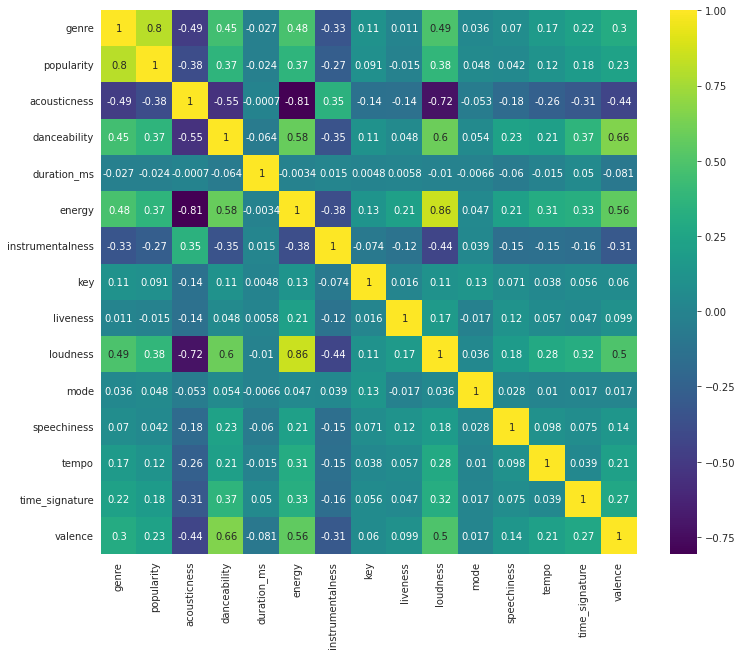

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [33]:
df.corrwith(df.popularity, axis = 0)

genre               0.802627
popularity          1.000000
acousticness       -0.384158
danceability        0.368483
duration_ms        -0.024092
energy              0.371528
instrumentalness   -0.272358
key                 0.090671
liveness           -0.014924
loudness            0.383394
mode                0.047885
speechiness         0.042287
tempo               0.123209
time_signature      0.178777
valence             0.233570
dtype: float64

In [34]:
features= ['acousticness' , 'danceability' , 'energy' , 'instrumentalness' ,'loudness' ,'tempo' , 'valence']

##making a data set of only numeric data

In [35]:
num_df = df._get_numeric_data()

# Decision Tree Regressor

In [36]:
!pip install pydot
!pip install six
import pydot
from IPython.display import Image
from six import StringIO
#from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

In [37]:
y_name='popularity'

X = num_df.drop(y_name, axis=1)
y = num_df[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




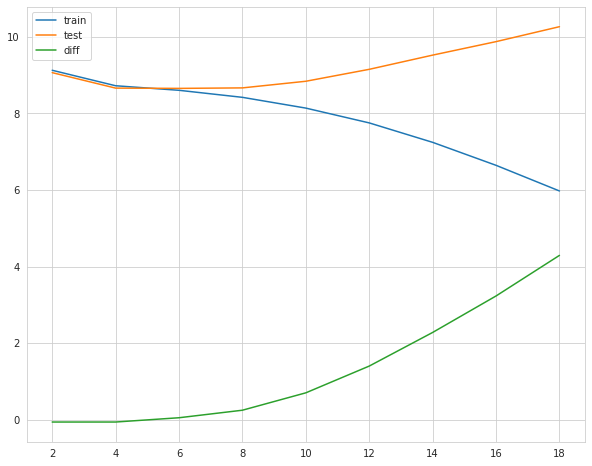

In [38]:
from IPython.display import clear_output 
l =[]
interval = np.arange(2,20,2)
results_test = []
results_train = []
c = 0 
for i in interval:
  c +=1 
  clear_output(wait=True)
 
  # training model - on train set 
  tree_model = DecisionTreeRegressor(max_depth=i)
  tree_model.fit(X_train, y_train)

  # predicting on test set 
  y_test_pred = tree_model.predict(X_test)
  result_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

  y_train_pred = tree_model.predict(X_train)
  result_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

  results_test.append(result_test)
  results_train.append(result_train)
  if c > 5 :
    d = pd.DataFrame(data= {"train":results_train,
                            "test":results_test,
                            "diff" :[j-i for i,j in zip(results_train,results_test)]
                            },
                            index = interval[:c]
                     )
    
    d.plot(figsize = (10, 8))
    plt.show()

In [39]:
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_test_pred = tree_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"tree_rmse = {rmse}")

y_train_pred = tree_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"train tree rmse = {rmse}")


y_test_pred = reg_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"linear_regression_rmse = {rmse}")

y_train_pred = reg_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"train linear_regression_rmse = {rmse}")


tree_rmse = 8.656150787033681
train tree rmse = 8.670138389983192
linear_regression_rmse = 8.62892407979516
train linear_regression_rmse = 8.710227659058965


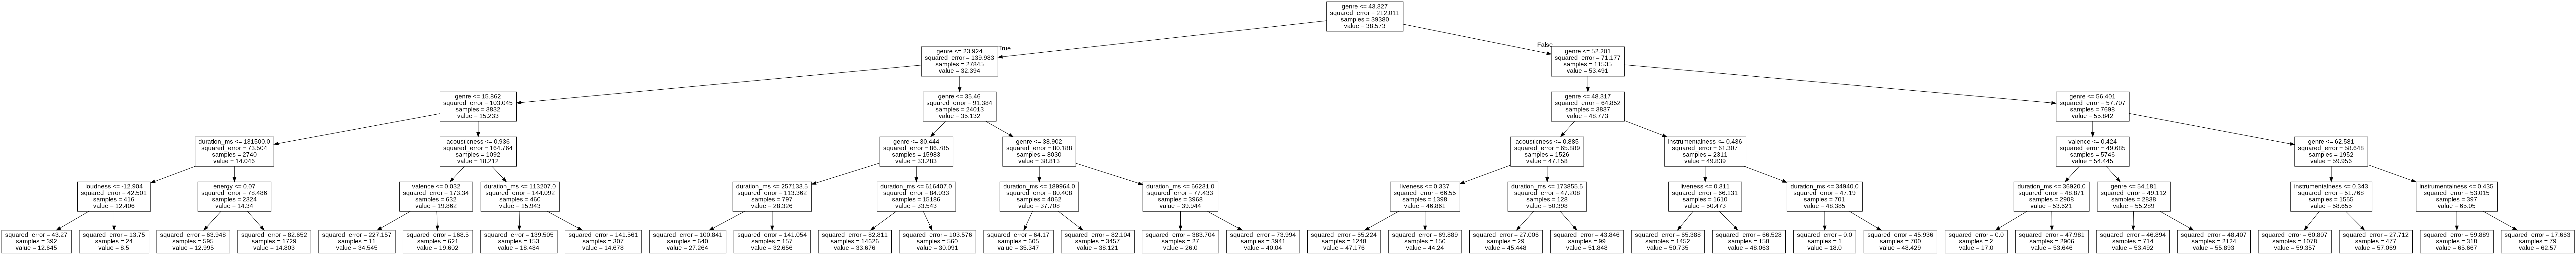

In [40]:
dot_data = StringIO()  
export_graphviz(tree_model, out_file=dot_data, feature_names=X.columns, leaves_parallel=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png(), width=2000)

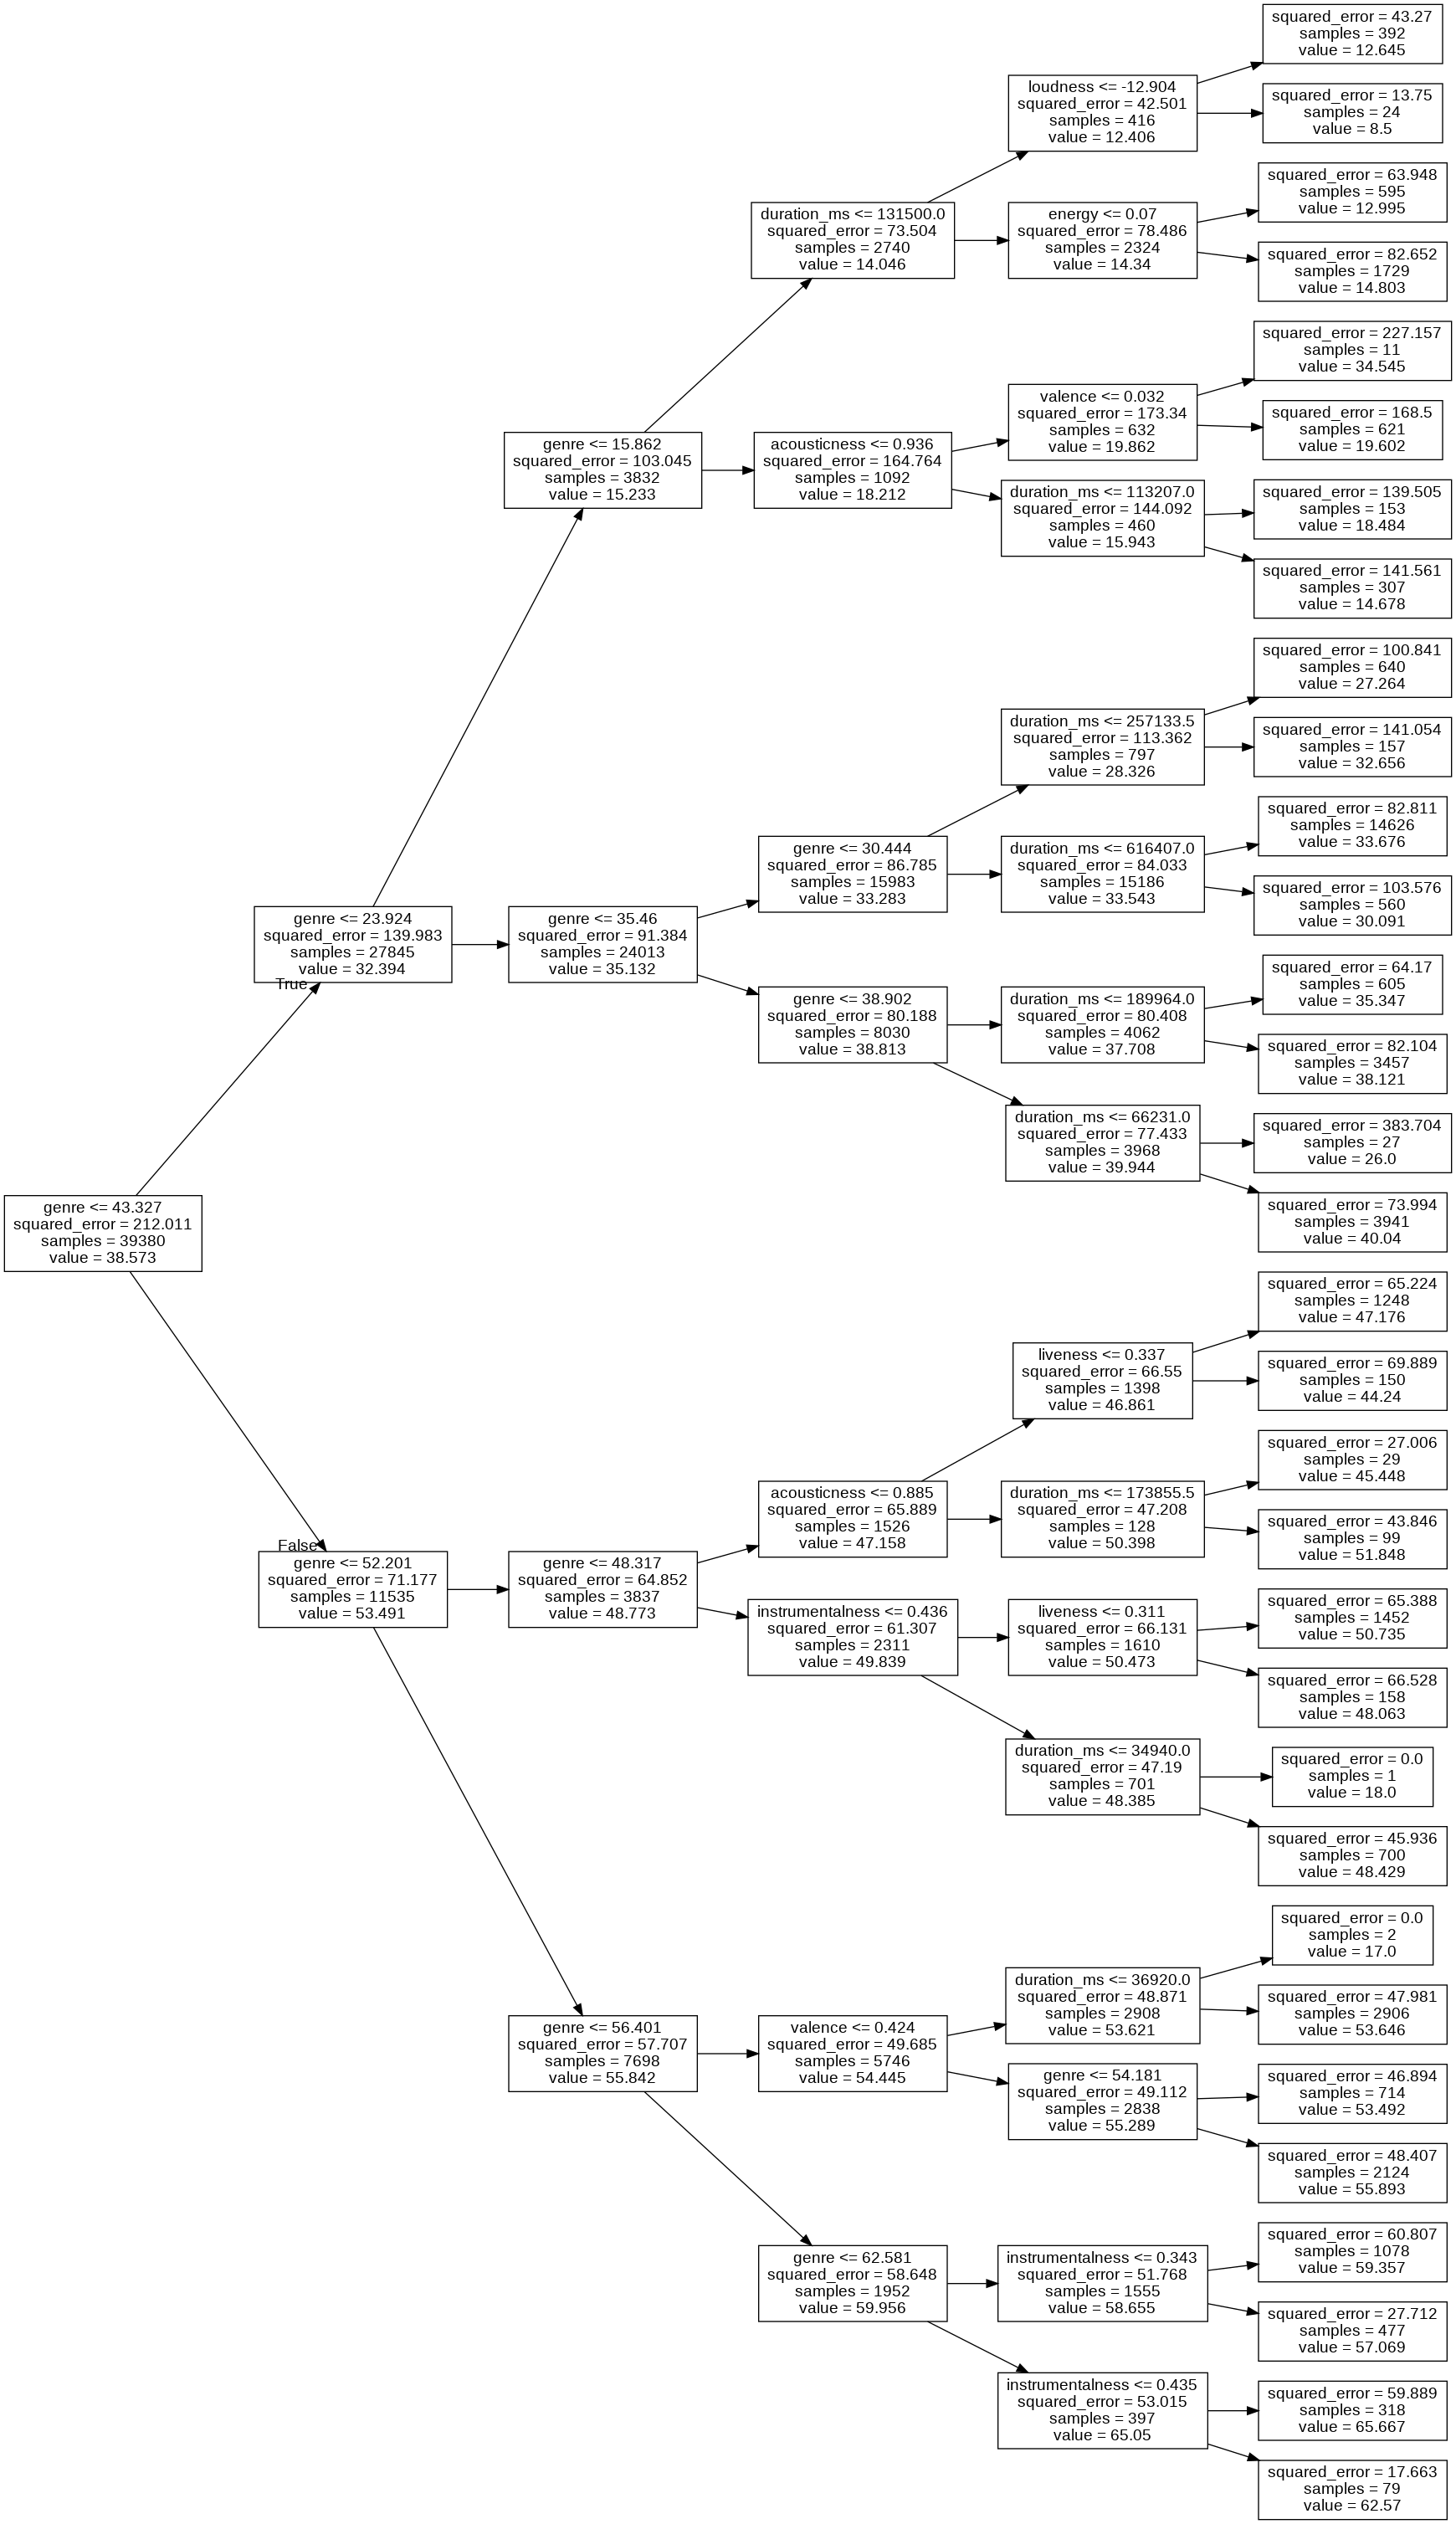

In [44]:
dot_data = StringIO()  
export_graphviz(tree_model, out_file=dot_data, feature_names=X_train.columns, leaves_parallel=True,rotate=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png(), width=1200) 

In [41]:
for feature, importance in zip(X.columns, tree_model.feature_importances_):
    print(f'{feature:12}: {importance}')

genre       : 0.9911658392133794
acousticness: 0.001030993954217196
danceability: 0.0
duration_ms : 0.005041782251782389
energy      : 0.00026847131596460577
instrumentalness: 0.0008287876057505232
key         : 0.0
liveness    : 0.0004029723854662413
loudness    : 7.211923779945185e-05
mode        : 0.0
speechiness : 0.0
tempo       : 0.0
time_signature: 0.0
valence     : 0.001189034035640199


KNN regressor

In [67]:
#KNN with default values
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
y_prediction_train = model.predict(X_train)
rmse_train = mean_squared_error(y_train, y_prediction_train) ** 0.5

test_score = model.score(X_test, y_test)
y_prediction_test = model.predict(X_test)
rmse_test = mean_squared_error(y_test, y_prediction_test) ** 0.5

print('RMSE values:','Train:',rmse_train,'Test:',rmse_test)
print('R2 scores:','Train:',train_score,'Test:',test_score)

RMSE values: Train: 10.28494834790361 Test: 13.171314611881568
R2 scores: Train: 0.5010625760005405 Test: 0.20154248071294145


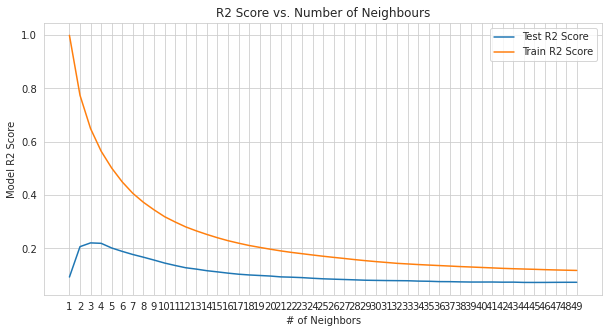

In [62]:
knn_n =[]
train_scores = []
test_scores = []
for i in range(1,50):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    knn_n.append(i)
plt.figure(figsize=[10,5])
plt.plot(knn_n, test_scores, label = 'Test R2 Score')
plt.plot(knn_n, train_scores, label = 'Train R2 Score')
plt.legend()
plt.title('R2 Score vs. Number of Neighbours')
plt.xlabel('# of Neighbors')
plt.ylabel('Model R2 Score')
plt.xticks(knn_n)
plt.show()

In [65]:
print("Optimal R2 score is {} with k = {}".format(np.max(test_scores),1+test_scores.index(np.max(test_scores))))

Optimal R2 score is 0.22065979466377583 with k = 3


In [68]:
# Run with optimal naigbors count of k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
score_train = model.score(X_train, y_train)
rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5

y_pred_test = model.predict(X_test)
score_test = model.score(X_test, y_test)
rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5

print('RMSE values:','Train:',rmse_train,'Test:',rmse_test)
print('R2 scores:','Train:',train_score,'Test:',test_score)

RMSE values: Train: 8.62642890549991 Test: 13.012680201789465
R2 scores: Train: 0.5010625760005405 Test: 0.20154248071294145
